In [3]:
import yfinance as yf
import pandas as pd
import os

In [4]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC") 
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [5]:
sp500.index = pd.to_datetime(sp500.index, utc=True)

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 05:00:00+00:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 05:00:00+00:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 05:00:00+00:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-18 04:00:00+00:00,5154.770020,5175.600098,5145.470215,5149.419922,4036220000,0.0,0.0
2024-03-19 04:00:00+00:00,5139.089844,5180.310059,5131.589844,5178.509766,4031760000,0.0,0.0
2024-03-20 04:00:00+00:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,0.0,0.0


<Axes: xlabel='Date'>

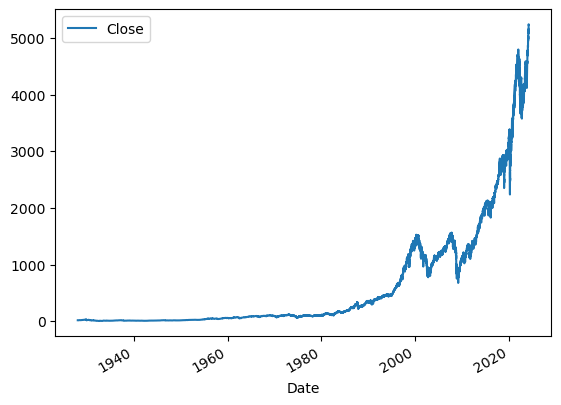

In [7]:
sp500.plot.line(y="Close", use_index=True)

In [10]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [18]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [20]:
sp500 = sp500.loc["1990-01-01":].copy()

In [22]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 05:00:00+00:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 05:00:00+00:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 05:00:00+00:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 05:00:00+00:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 05:00:00+00:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-03-18 04:00:00+00:00,5154.770020,5175.600098,5145.470215,5149.419922,4036220000,5178.509766,1
2024-03-19 04:00:00+00:00,5139.089844,5180.310059,5131.589844,5178.509766,4031760000,5224.620117,1
2024-03-20 04:00:00+00:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,5241.529785,1


In [32]:
'''
Random forest model uses multiple decision trees to make predictions. Each tree is trained on random subsets of the data
and makes its own predictions. The final output is determined by averaging the predictions from all trees (for regression)
or by a majority vote (for classification). 
'''

'\nRandom forest model uses multiple decision trees to make predictions. Each tree is trained on random subsets of the data\nand makes its own predictions. The final output is determined by averaging the predictions from all trees (for regression)\nor by a majority vote (for classification). \n'

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [24]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [25]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [26]:
precision_score(test["Target"], preds)

0.631578947368421

In [27]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

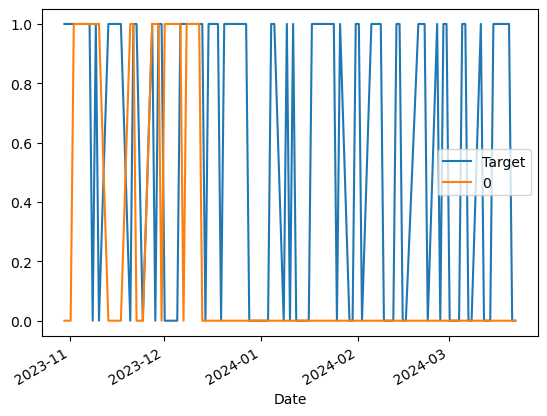

In [28]:
combined.plot()

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [30]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)      

In [31]:
predictions = backtest(sp500, model, predictors)

In [32]:
predictions["Predictions"].value_counts()

Predictions
0    3526
1    2596
Name: count, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [37]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534793
0    0.465207
Name: count, dtype: float64

In [39]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [47]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 05:00:00+00:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 05:00:00+00:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 05:00:00+00:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 05:00:00+00:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 05:00:00+00:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15 04:00:00+00:00,5123.310059,5136.859863,5104.350098,5117.089844,7753670000,5149.419922,1,0.996748,0.0,0.994533,1.0,1.038407,34.0,1.141730,140.0,1.257523,532.0
2024-03-18 04:00:00+00:00,5154.770020,5175.600098,5145.470215,5149.419922,4036220000,5178.509766,1,1.003149,1.0,0.999594,2.0,1.043622,34.0,1.147717,140.0,1.264685,532.0
2024-03-19 04:00:00+00:00,5139.089844,5180.310059,5131.589844,5178.509766,4031760000,5224.620117,1,1.002817,2.0,1.005114,2.0,1.047818,35.0,1.152992,140.0,1.271007,533.0


In [48]:
sp500 = sp500.dropna()

In [49]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 05:00:00+00:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 05:00:00+00:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 05:00:00+00:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 05:00:00+00:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 05:00:00+00:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15 04:00:00+00:00,5123.310059,5136.859863,5104.350098,5117.089844,7753670000,5149.419922,1,0.996748,0.0,0.994533,1.0,1.038407,34.0,1.141730,140.0,1.257523,532.0
2024-03-18 04:00:00+00:00,5154.770020,5175.600098,5145.470215,5149.419922,4036220000,5178.509766,1,1.003149,1.0,0.999594,2.0,1.043622,34.0,1.147717,140.0,1.264685,532.0
2024-03-19 04:00:00+00:00,5139.089844,5180.310059,5131.589844,5178.509766,4031760000,5224.620117,1,1.002817,2.0,1.005114,2.0,1.047818,35.0,1.152992,140.0,1.271007,533.0


In [51]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [54]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [56]:
predictions = backtest(sp500, model, new_predictors)

In [59]:
predictions["Predictions"].value_counts()

Predictions
0.0    4289
1.0     832
Name: count, dtype: int64

In [61]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5733173076923077